<a href="https://colab.research.google.com/github/pratikshaa12/Deep-learning/blob/main/Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Binary  classification - Booking cancellation data

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

#### Step 1 - Data ingestion

In [3]:
import pandas as pd
url1 ="https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/booking_train.csv"
df = pd.read_csv(url1)
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


#### Step 2 - Perform basic data quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [5]:
df.isna().sum()

,0
id,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


In [6]:
df.duplicated().sum()

0

#### Step 3 - Separate x and y(booking_status)

In [7]:
x = df.drop(columns=["id", "booking_status"])
y= df[["booking_status"]]

In [8]:
x.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0


In [12]:
y.head()

,booking_status
0,0
1,0
2,0
3,0
4,1


<Axes: xlabel='booking_status'>

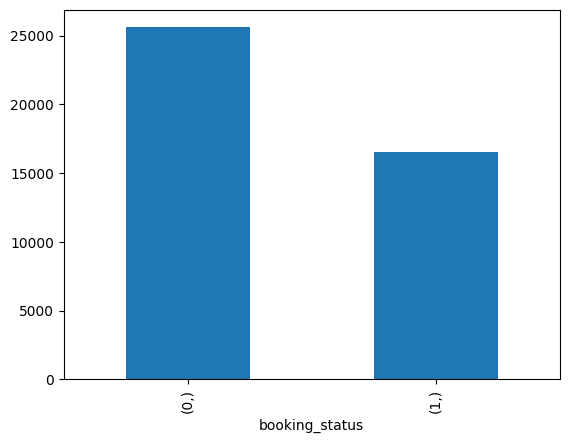

In [13]:
y.value_counts().plot(kind="bar")

#### Step 4 - Apply preprocessing on x

In [10]:
x.dtypes

,0
no_of_adults,int64
no_of_children,int64
no_of_weekend_nights,int64
no_of_week_nights,int64
type_of_meal_plan,int64
required_car_parking_space,int64
room_type_reserved,int64
lead_time,int64
arrival_year,int64
arrival_month,int64


In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [16]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")

In [17]:
x_pre = num_pipe.fit_transform(x)
x_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.151040,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-1.170469,0.409661,-2.330398,-0.214091,0.428551,5.766758,33.699120,-0.101479,-0.998052,-0.737691
1,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,0.161740,0.409661,-0.209778,1.473487,-1.149928,-0.173408,-0.060506,-0.101479,-0.870153,-0.737691
2,0.151040,-0.313454,-0.998814,-0.979466,-0.407020,-0.160945,-0.515173,2.604122,0.409661,1.557404,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.415406,-0.737691
3,-1.753925,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-0.886758,0.409661,1.557404,-1.676659,0.428551,-0.173408,-0.060506,-0.101479,-1.307702,-0.737691
4,0.151040,-0.313454,0.130259,-1.680084,-0.407020,-0.160945,-0.515173,1.901012,0.409661,0.850531,0.010919,-1.149928,-0.173408,-0.060506,-0.101479,-0.122955,-0.737691


#### Step 5 - Train test split

In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_pre, y, test_size=0.2, random_state=42)

In [19]:
xtrain.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
15559,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,0.685890,-0.479694,0.409661,1.203968,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.199998,1.842849
32783,0.151040,-0.313454,0.130259,1.122386,-0.407020,-0.160945,0.685890,-0.381012,0.409661,1.557404,1.135971,0.428551,-0.173408,-0.060506,-0.101479,0.189388,0.552579
11797,2.056005,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,0.685890,-0.282330,0.409661,0.497095,-0.889123,0.428551,-0.173408,-0.060506,-0.101479,1.716096,-0.737691
39750,0.151040,-0.313454,-0.998814,-0.979466,2.996268,-0.160945,-0.515173,1.444607,0.409661,0.143658,-0.439102,-1.149928,-0.173408,-0.060506,-0.101479,0.280936,0.552579
28711,0.151040,-0.313454,1.259332,0.421768,-0.407020,-0.160945,0.685890,-0.109636,0.409661,0.850531,-1.001628,0.428551,-0.173408,-0.060506,-0.101479,0.746758,-0.737691


In [20]:
ytrain.head()

,booking_status
15559,0
32783,0
11797,1
39750,1
28711,1


In [21]:
xtest.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
8768,0.15104,-0.313454,-0.998814,0.421768,-0.40702,-0.160945,-0.515173,-0.566041,0.409661,-2.330398,1.135971,-1.149928,-0.173408,-0.060506,-0.101479,-0.643436,0.552579
38340,0.15104,-0.313454,-0.998814,-0.278849,-0.40702,-0.160945,-0.515173,1.481613,0.409661,0.143658,-1.564154,0.428551,-0.173408,-0.060506,-0.101479,-0.285588,-0.737691
7104,0.15104,-0.313454,1.259332,-0.979466,-0.40702,-0.160945,4.289080,-0.553706,0.409661,-1.623525,1.023466,0.428551,-0.173408,-0.060506,-0.101479,0.002252,-0.737691
36898,0.15104,1.908162,1.259332,1.122386,-0.40702,-0.160945,-0.515173,-0.566041,0.409661,1.203968,-0.551607,0.428551,-0.173408,-0.060506,-0.101479,0.541312,3.133119
9747,0.15104,-0.313454,1.259332,0.421768,-0.40702,-0.160945,-0.515173,0.507127,0.409661,-1.270088,1.585992,0.428551,-0.173408,-0.060506,-0.101479,-0.366636,0.552579


In [22]:
ytest.head()

,booking_status
8768,0
38340,1
7104,0
36898,0
9747,0


In [23]:
xtrain.shape

(33680, 17)

In [24]:
xtrain.shape[1]

17

#### Step 6 - Build the neural network


In [26]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout

In [27]:
# Initialize the model
model=Sequential()

# Input layer
model.add(Input(shape=(xtrain.shape[1],)))

# dense layer 1
model.add(Dense(units=32, activation="relu"))

# Dropout layer 1
model.add(Dropout(rate=0.3))

# Dense layer 2
model.add(Dropout(rate=0.2))

# Dropout layer 2
model.add(Dropout(rate=0.2))

# Output layer
model.add(Dense(units=1, activation="sigmoid"))

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 609 (2.38 KB)

 Trainable params: 609 (2.38 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [31]:
hist=model.fit(xtrain, ytrain, validation_split=0.2, epochs=60)

Epoch 1/60
842/842 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6356 - loss: 0.6362 - val_accuracy: 0.7675 - val_loss: 0.4929
Epoch 2/60
842/842 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7594 - loss: 0.5046 - val_accuracy: 0.7689 - val_loss: 0.4854
Epoch 3/60
842/842 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7644 - loss: 0.4908 - val_accuracy: 0.7743 - val_loss: 0.4825
Epoch 4/60
842/842 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7715 - loss: 0.4863 - val_accuracy: 0.7711 - val_loss: 0.4817
Epoch 5/60
842/842 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7718 - loss: 0.4852 - val_accuracy: 0.7733 - val_loss: 0.4796
Epoch 6/60
842/842 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7762 - loss: 0.4838 - val_accuracy: 0.7749 - val_loss: 0.4780
Epoch 7/60
842/842 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7778 - loss: 0.4768 - val_accuracy: 0.7776 - val_loss: 0.4776
Epoch 8/60
842/842 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7809 - loss: 0.4760 - val_accuracy: 0.

#### Plot the learning curve

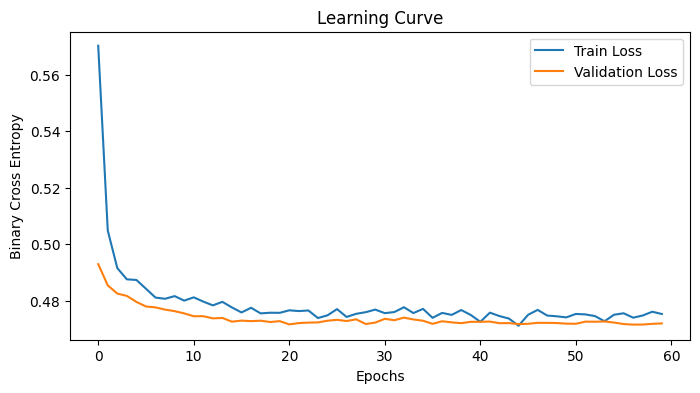

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(hist.history["loss"], label="Train Loss")
plt.plot(hist.history["val_loss"],  label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Binary Cross Entropy")
plt.title("Learning Curve")
plt.legend()
plt.show()


#### Model Evaluation

In [35]:
model.evaluate(xtrain,ytrain)

1053/1053 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7901 - loss: 0.4562


[0.45748257637023926, 0.7886876463890076]

In [36]:
model.evaluate(xtest, ytest)

264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7936 - loss: 0.4582


[0.4572468101978302, 0.7896674871444702]

#### Detailed model evaluation

In [37]:
yprob_train = model.predict(xtrain)
yprob_train[0:5]

1053/1053 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.00382668],
       [0.27830228],
       [0.8139888 ],
       [0.5328258 ],
       [0.7576397 ]], dtype=float32)

if prob>=0.5 classify as 1

if prob< 0.5 classify as 0

In [38]:
ypred_train = [1 if prob>= 0.5 else 0 for prob in yprob_train]
ypred_train[0:5]

[0, 0, 1, 1, 1]

In [39]:
ytrain.head()

,booking_status
15559,0
32783,0
11797,1
39750,1
28711,1


In [40]:
yprob_test = model.predict(xtest)
yprob_test[0:5]

264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.05322239],
       [0.84716696],
       [0.4731207 ],
       [0.02697084],
       [0.3836732 ]], dtype=float32)

In [42]:
ypred_test  =[1 if prob >= 0.5 else 0 for prob in yprob_test]
ypred_test[0:5]

[0, 1, 0, 0, 0]

In [44]:
ytest.head()

,booking_status
8768,0
38340,1
7104,0
36898,0
9747,0


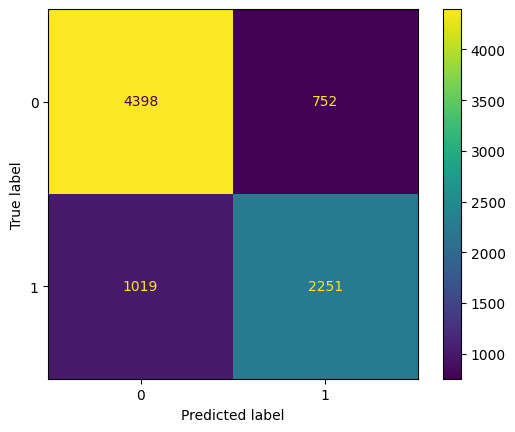

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)

In [46]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      5150
           1       0.75      0.69      0.72      3270

    accuracy                           0.79      8420
   macro avg       0.78      0.77      0.78      8420
weighted avg       0.79      0.79      0.79      8420



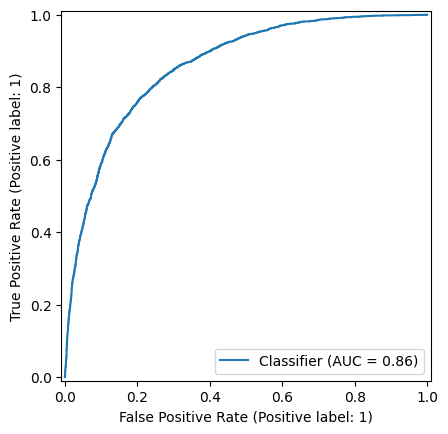

In [47]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(ytest, yprob_test)

#####  Above model is good model and can be used for out of sample prediction

### Step 8 - Out of sample prediction

In [48]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/booking_test.csv"
xnew= pd.read_csv(url2)
xnew.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [49]:
xnew2 = xnew.drop(columns=["id"])
xnew2.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [50]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [51]:
xnew2_pre= num_pipe.transform(xnew2)
xnew2_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2.056005,-0.313454,0.130259,1.122386,-0.407020,-0.160945,0.685890,0.087728,0.409661,1.557404,-1.226638,0.428551,-0.173408,-0.060506,-0.101479,0.297092,1.842849
1,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-1.010111,-2.441040,0.850531,0.573445,-1.149928,-0.173408,-0.060506,-0.101479,-0.526846,-0.737691
2,0.151040,4.129777,-0.998814,-0.979466,-0.407020,-0.160945,3.088017,-1.059452,0.409661,0.143658,-0.664112,0.428551,-0.173408,-0.060506,-0.101479,3.646696,0.552579
3,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-0.195983,0.409661,-0.916652,1.585992,-1.149928,-0.173408,-0.060506,-0.101479,-0.641282,-0.737691
4,-1.753925,-0.313454,-0.998814,-0.278849,2.996268,-0.160945,-0.515173,-1.195140,0.409661,0.497095,0.573445,0.428551,-0.173408,-0.060506,-0.101479,1.061793,-0.737691


In [53]:
probs= model.predict(xnew2_pre)
probs[0:5]

878/878 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.11268441],
       [0.03652791],
       [0.2680562 ],
       [0.22067878],
       [0.6150333 ]], dtype=float32)

In [54]:
preds =[1 if p >= 0.5 else 0 for p in probs]
preds[0:5]

[0, 0, 0, 0, 1]

In [56]:
res = xnew[["id"]]
res.head()

,id
0,42100
1,42101
2,42102
3,42103
4,42104


In [61]:
res["booking_pred"] = preds
res["booking_prob"] = probs
res = res.round(4)
res

,id,boooking_pred,bookin_prob,booking_pred,booking_prob
0,42100,0,0.1127,0,0.1127
1,42101,0,0.0365,0,0.0365
2,42102,0,0.2681,0,0.2681
3,42103,0,0.2207,0,0.2207
4,42104,1,0.6150,1,0.6150
...,...,...,...,...,...
28063,70163,1,0.9760,1,0.9760
28064,70164,0,0.0620,0,0.0620
28065,70165,0,0.1356,0,0.1356
28066,70166,0,0.4941,0,0.4941


In [62]:
res["booking_pred"].value_counts()

,count
booking_pred,
0,18096
1,9972


<Axes: xlabel='booking_pred'>

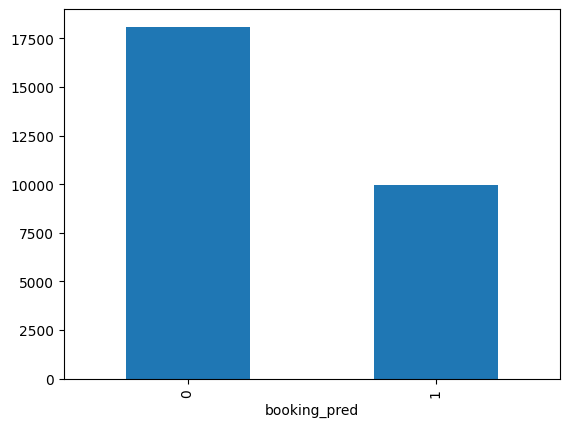

In [64]:
res["booking_pred"].value_counts().plot(kind="bar")

In [65]:
res.to_csv("BookingResults.csv", index=False)


Save the model

In [67]:
model.save("booking.keras")

Load this model

In [68]:
from keras.models import load_model

In [69]:
nn= load_model("/content/booking.keras")
nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,829 (7.15 KB)

 Trainable params: 609 (2.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,220 (4.77 KB)